In [1]:
import pandas as pd
import numpy as np
import glob
import os
import nltk
import re

In [2]:
df = pd.read_csv("Data//jigsaw-toxic-comment-classification-challenge//train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:

df['hate'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']


df = df.drop(['id','toxic','severe_toxic','obscene','threat','insult', 'identity_hate'], axis=1)




In [4]:
df['hate'][df['hate']>0]=1
df


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,hate
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [5]:
df.isnull().values.any()

False

In [6]:
df1 = pd.read_csv('Data//hate-speech-dataset-master//annotations_metadata.csv')

print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
file_id         10944 non-null object
user_id         10944 non-null int64
subforum_id     10944 non-null int64
num_contexts    10944 non-null int64
label           10944 non-null object
dtypes: int64(3), object(2)
memory usage: 427.6+ KB
None
      file_id  user_id  subforum_id  num_contexts   label
0  12834217_1   572066         1346             0  noHate
1  12834217_2   572066         1346             0  noHate
2  12834217_3   572066         1346             0  noHate
3  12834217_4   572066         1346             0    hate
4  12834217_5   572066         1346             0  noHate


In [7]:
df1['label'] = df1['label'].map(dict(noHate=0, hate=1))
df1.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,0.0
1,12834217_2,572066,1346,0,0.0
2,12834217_3,572066,1346,0,0.0
3,12834217_4,572066,1346,0,1.0
4,12834217_5,572066,1346,0,0.0


In [8]:
def read_file(id):
    with open('Data//hate-speech-dataset-master//all_files//' + id + '.txt', encoding="ISO-8859-1") as f:
        text = f.read()
    return text

df1['comment_text'] = df1['file_id'].apply(read_file)
df1.head()

,file_id,user_id,subforum_id,num_contexts,label,comment_text
0,12834217_1,572066,1346,0,0.0,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,0.0,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,0.0,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,1.0,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,0.0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [9]:
df1 = df1.drop(['file_id', 'user_id', 'subforum_id', 'num_contexts'], axis=1)
df1.rename(columns={'label':'hate'}, inplace=True)
df1

,hate,comment_text
0,0.0,"As of March 13th , 2014 , the booklet had been..."
1,0.0,In order to help increase the booklets downloa...
2,0.0,( Simply copy and paste the following text int...
3,1.0,Click below for a FREE download of a colorfull...
4,0.0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...
5,0.0,"Booklet updated on Feb. 14th , 2014 ."
6,0.0,"( Now with over 18,300 Downloads. )"
7,0.0,PDF file : http://www.mediafire.com/download/7...
8,0.0,Then why not simply copy this text ( & links )...
9,0.0,Thank you in advance. : ) Download the youtube...


In [10]:
df1 = df1[['comment_text', 'hate']]

df1.head()

,comment_text,hate
0,"As of March 13th , 2014 , the booklet had been...",0.0
1,In order to help increase the booklets downloa...,0.0
2,( Simply copy and paste the following text int...,0.0
3,Click below for a FREE download of a colorfull...,1.0
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0.0


In [11]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10943
Data columns (total 2 columns):
comment_text    10703 non-null object
hate            10703 non-null float64
dtypes: float64(1), object(1)
memory usage: 250.9+ KB


In [12]:
df2 = pd.read_csv("Data//twitter-hate-speech//train_E6oV3lV.csv", encoding="ISO-8859-1")
df2

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.Ã°Â...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [13]:
df2.rename(columns={'label':'hate', 'tweet':'comment_text'}, inplace=True)
df2 = df2.drop(['id'], axis=1)
df2 = df2[['comment_text', 'hate']]
df2

,comment_text,hate
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
5,[2/2] huge fan fare and big talking before the...,0
6,@user camping tomorrow @user @user @user @use...,0
7,the next school year is the year for exams.Ã°Â...,0
8,we won!!! love the land!!! #allin #cavs #champ...,0
9,@user @user welcome here ! i'm it's so #gr...,0


In [14]:
df2.isnull().values.any()

False

In [15]:
def remove_handler(comment):
    comment = re.sub('@[\w]* ', "", comment)
    return comment

df2['comment_text'] = df2['comment_text'].apply(remove_handler)
#df2['comment_text'] = df2['comment_text'].str.replace("[^a-zA-Z#]", " ")
df2

,comment_text,hate
0,when a father is dysfunctional and is so self...,0
1,thanks for #lyft credit i can't use cause they...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
5,[2/2] huge fan fare and big talking before the...,0
6,camping tomorrow dannyÃ¢ÂÂ¦,0
7,the next school year is the year for exams.Ã°Â...,0
8,we won!!! love the land!!! #allin #cavs #champ...,0
9,welcome here ! i'm it's so #gr8 !,0


In [16]:
#REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #]')
data = df.append([df1, df2], ignore_index=True)
data
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].str.replace('[/(){}\[\]\|@,;\n]', " ")
data['comment_text'] = data['comment_text'].str.replace("[^a-zA-Z #]", "")
data

,comment_text,hate
0,explanation why the edits made under my userna...,0.0
1,daww he matches this background colour im seem...,0.0
2,hey man im really not trying to edit war its ...,0.0
3,more i cant make any real suggestions on impr...,0.0
4,you sir are my hero any chance you remember ...,0.0
5,congratulations from me as well use the too...,0.0
6,cocksucker before you piss around on my work,1.0
7,your vandalism to the matt shirvington article...,0.0
8,sorry if the word nonsense was offensive to yo...,0.0
9,alignment on this subject and which are contra...,0.0


In [17]:
data['hate'].sum()

19663.0

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lmtzer = WordNetLemmatizer()
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer('english')

In [19]:
X, y = data['comment_text'].values, data['hate'].values
pd.isnull(X).any()

False

In [50]:
def prepare_text(text):
    words = text.split()
    words = [w for w in words if not w in stopwords.words('english')]
    words = [lmtzer.lemmatize(w) for w in words]
    #words = [stemmer.stem(w) for w in words]
    clean_text = " ".join(words)
    return clean_text

X_clean = data['comment_text'].apply(lambda text: prepare_text(text))

In [51]:
X_clean.to_csv("X_clean.csv")

In [20]:
X_clean = pd.read_csv('X_clean', header=None)



In [21]:
data_clean = pd.DataFrame({'Comment': X_clean.iloc[:, 1], 'hate': y})
data_clean = data_clean.dropna()


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict
%matplotlib inline

def word_count(comments):
    words = []
    for comment in comments:
        words.extend(comment.split())
    return Counter(words)

hate_com = data_clean['Comment'][data_clean['hate'] == 1].values
reg_com = data_clean['Comment'][data_clean['hate'] == 0].values



hate_words = word_count(hate_com)
reg_words = word_count(reg_com)





#hate_dict = OrderedDict(hate_words.most_common(20))
#hate_df = pd.DataFrame({'Words': x, 'Counts': y})
#type(hate_com)
                        
#hate_dict.keys()
#list(hate_dict.values())
#hate_words = word_count(hate_com)
#reg_words = word_count(reg_com)
#hate_words


In [23]:
hate_df = pd.DataFrame.from_dict(hate_words, orient="index").reset_index()
hate_df = hate_df.rename(columns={'index':'Hate_Word', 0:'Word_Count'})
most_hate = hate_df.sort_values(by = ['Word_Count'], ascending=False)[:20]

reg_df = pd.DataFrame.from_dict(reg_words, orient="index").reset_index()
reg_df = reg_df.rename(columns={'index':'Reg_Word', 0:'Word_Count'})
most_reg = reg_df.sort_values(by = ['Word_Count'], ascending=False)[:20]


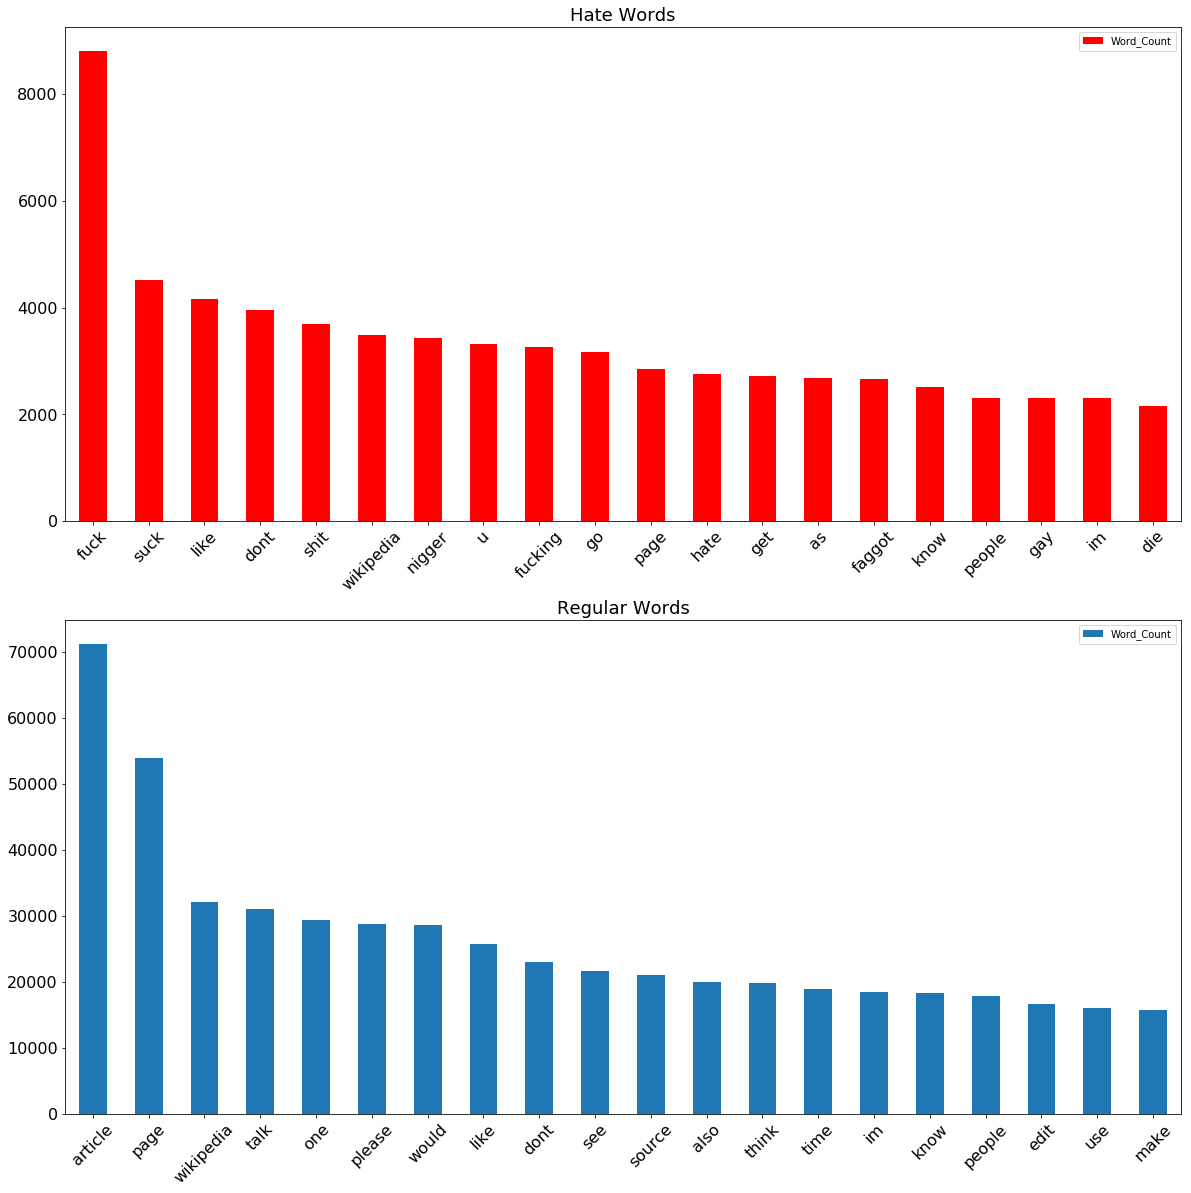

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=0.2)
most_hate.plot(x='Hate_Word', y='Word_Count', kind='bar', ax=axes[0], fontsize=16, rot=45, color='r')
axes[0].set_title('Hate Words', fontsize=18)
axes[0].set_xlabel('')
most_reg.plot(x='Reg_Word', y='Word_Count', kind='bar', ax=axes[1], fontsize=16, rot=45)
axes[1].set_title("Regular Words", fontsize=18)
axes[1].set_xlabel('')

fig.savefig('Word_Freq.jpg')



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['Comment'].values, data_clean['hate'].values, test_size= 0.25, random_state=42)
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [28]:
tuned_parameters = {'C': [0.1, 1, 10, 100]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train_tfidf, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_tfidf)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10}

Grid scores on development set:

0.789 (+/-0.005) for {'C': 0.1}
0.843 (+/-0.005) for {'C': 1}
0.857 (+/-0.007) for {'C': 10}
0.835 (+/-0.006) for {'C': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97     45704
        1.0       0.73      0.68      0.70      4812

avg / total       0.94      0.95      0.94     50516


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 0.1}

Grid scores on development set:

0.864 (+/-0.005) for {'C': 0.1}
0.846 (+/-0.005) for {'C': 1}
0.802 (+/-0.008) for {'C': 10}
0.791 (+/-0.010) for {'C': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

In [30]:
from sklearn.externals import joblib
model_name = "hate_speech_SVM.sav"
joblib.dump(clf, model_name)

['hate_speech_SVM.sav']

In [40]:
sent = "go back to your country"
sent_tfidf = tfidf_vectorizer.transform([sent])
clf.predict(sent_tfidf)

array([1.])